In [4]:
library(dplyr)
library(ggplot2)
library(ggpubr)
library(cowplot)
library(igraph)
require(VennDiagram)
species <- "Mouse"
out <- "test"


rss <- read.csv("../../1.mouse/3.default_1000perCluster/1.results/Mouse_brain.auc_rss.celltype_family.csv", check.names = FALSE, row.names = 1)
rownames(rss) <- vapply(rownames(rss), FUN = function(x){ gsub('\\(\\+\\)','',x)}, FUN.VALUE = character(1))
#rownames(rss) <- ID2name[match(rownames(rss), ID2name$Gene.stable.ID), "Gene.name"]
colnames(rss) <- as.character(colnames(rss))
paralogs <- read.delim("/mnt/data01/yuanzhen/01.Vertebrate_cell_evo/01.data/04.paralogs_Ensembl/Ensembl.Biomart.Paralogs_mouse.txt", header = T, sep = ",")

In [16]:
regulon <- read.csv("../../1.mouse/3.default_1000perCluster/1.results/Mouse_brain.regulons_df.csv", check.names = FALSE)
regulon$TF <- vapply(regulon$TF, FUN = function(x){ gsub('\\(\\+\\)','',x)}, FUN.VALUE = character(1))

In [17]:
head(regulon)

value     TF           
1 Rnase4 0.5596655 1810024B03Rik
2 Dhx16  0.4256432 1810024B03Rik
3 Pon3   1.0727133 1810024B03Rik
4 Mdfic  0.7363233 1810024B03Rik
5 Fkbp11 0.5349831 1810024B03Rik
6 Vangl1 0.4362672 1810024B03Rik

In [5]:
head(rss)

Immune cells Vascular cells Oligodendrocyte precursor cells
1810024B03Rik 0.2903523    0.1931095      0.2021820                      
AW146154      0.2045576    0.1962815      0.1906689                      
Ar            0.1863451    0.1905854      0.1721670                      
Arid3a        0.2157615    0.1823367      0.1759912                      
Arnt          0.2186263    0.2433208      0.1997183                      
Arnt2         0.1870303    0.1989400      0.2107473                      
              Microglia Telencephalon glutamatergic neurons Oligodendrocytes
1810024B03Rik 0.3721877 0.1740388                           0.1901684       
AW146154      0.2025567 0.2173034                           0.2312015       
Ar            0.1829786 0.1759665                           0.1714111       
Arid3a        0.1915935 0.1799368                           0.1706109       
Arnt          0.2327793 0.1931857                           0.2610560       
Arnt2         0.1916933 0.2756380                           0.2268414       
              Diencephalon GABAergic neurons Astrocytes
1810024B03Rik 0.1756479                      0.2193702 
AW146154      0.1886114                      0.2234619 
Ar            0.2350472                      0.2016828 
Arid3a        0.1814477                      0.2031806 
Arnt          0.1772139                      0.2002844 
Arnt2         0.2348407                      0.2540488 
              Telencephalon GABAergic neurons Neuroblasts ⋯
1810024B03Rik 0.1778824                       0.1998761   ⋯
AW146154      0.2451067                       0.2119940   ⋯
Ar            0.1944815                       0.1822272   ⋯
Arid3a        0.1802863                       0.1910822   ⋯
Arnt          0.1954119                       0.1947073   ⋯
Arnt2         0.2791072                       0.2391233   ⋯
              Mesencephalon GABAergic neurons
1810024B03Rik 0.1729537                      
AW146154      0.1862343                      
Ar            0.1761587                      
Arid3a        0.1790122                      
Arnt          0.1767675                      
Arnt2         0.2382668                      
              Mesencephalon glutamatergic neurons Olfactory ensheathing cells
1810024B03Rik 0.1742816                           0.1974834                  
AW146154      0.1895139                           0.1964849                  
Ar            0.2055037                           0.1842486                  
Arid3a        0.1834907                           0.1737429                  
Arnt          0.1821337                           0.2035735                  
Arnt2         0.2395896                           0.2124177                  
              Diencephalon cholinergic neurons Choroid plexus epithelial cells
1810024B03Rik 0.1676707                        0.2621372                      
AW146154      0.1676114                        0.1748162                      
Ar            0.1674454                        0.1688555                      
Arid3a        0.1684733                        0.1748162                      
Arnt          0.1680416                        0.1806165                      
Arnt2         0.1765720                        0.1903688                      
              Peptidergic neurons Rhombencephalon cholinergic neurons
1810024B03Rik 0.1708755           0.1676272                          
AW146154      0.1697882           0.1681985                          
Ar            0.1676356           0.1843922                          
Arid3a        0.1880445           0.1690226                          
Arnt          0.1690873           0.1687316                          
Arnt2         0.1783103           0.1993281                          
              Diencephalon glutamatergic neurons
1810024B03Rik 0.1742028                         
AW146154      0.1835086                         
Ar            0.1821465                         
Arid3a        0.1774750               

In [24]:
count <- read.csv("/mnt/data01/yuanzhen/01.Vertebrate_cell_evo/09.GRNs_detection/1.mouse/3.default_1000perCluster/0.exprMat.subset.csv", header = T)

In [25]:
head(count)

X10X19_2_CAAGAAGACTATTC.1 X10X49_1_ATTCTGTAAGCC.
ENSMUSG00000024647 0                         0                     
ENSMUSG00000029503 0                         0                     
ENSMUSG00000039942 0                         0                     
ENSMUSG00000017756 0                         0                     
ENSMUSG00000068327 0                         0                     
ENSMUSG00000079560 0                         0                     
                   X10X28_3_TCAGGATGCGTGTA.1 X10X05_2_AAGCGTACACACGT.1
ENSMUSG00000024647 1                         0                        
ENSMUSG00000029503 0                         0                        
ENSMUSG00000039942 0                         0                        
ENSMUSG00000017756 0                         0                        
ENSMUSG00000068327 0                         0                        
ENSMUSG00000079560 0                         0                        
                   X10X22_2_TATAAGTGCACTTT.1 X10X05_1_TAACGTCTGTGCAT.1
ENSMUSG00000024647 0                         0                        
ENSMUSG00000029503 0                         0                        
ENSMUSG00000039942 0                         0                        
ENSMUSG00000017756 0                         0                        
ENSMUSG00000068327 0                         0                        
ENSMUSG00000079560 0                         0                        
                   X10X05_1_AAGTCCGATGAAGA.1 X10X51_1_GTGGGACATTGG.
ENSMUSG00000024647 0                         0                     
ENSMUSG00000029503 0                         0                     
ENSMUSG00000039942 0                         0                     
ENSMUSG00000017756 0                         0                     
ENSMUSG00000068327 0                         0                     
ENSMUSG00000079560 0                         0                     
                   X10X28_2_TGCTTAACCACCAA.1 X10X22_1_GATCCGCTGCTACA.1 ⋯
ENSMUSG00000024647 0                         0                         ⋯
ENSMUSG00000029503 0                         0                         ⋯
ENSMUSG00000039942 0                         0                         ⋯
ENSMUSG00000017756 0                         0                         ⋯
ENSMUSG00000068327 0                         0                         ⋯
ENSMUSG00000079560 0                         0                         ⋯
                   X10X50_8_ATCCGAGTTTCT. X10X50_8_GTCAGACTAGTG.
ENSMUSG00000024647 3                      1                     
ENSMUSG00000029503 0                      0                     
ENSMUSG00000039942 0                      0                     
ENSMUSG00000017756 0                      0                     
ENSMUSG00000068327 0                      0                     
ENSMUSG00000079560 0                      0                     
                   X10X24_3_AGCATTCTGTTCAG.1 X10X50_6_TCATACCATGAC.
ENSMUSG00000024647 1                         0                     
ENSMUSG00000029503 0                         0                     
ENSMUSG00000039942 0                         0                     
ENSMUSG00000017756 0                         0                     
ENSMUSG00000068327 0                         0                     
ENSMUSG00000079560 0                         0                     
                   X10X24_4_GCGGAGCTGTCTGA.1 X10X54_1_AGCAGAGTAGCGGT.
ENSMUSG00000024647 2                         0                       
ENSMUSG00000029503 0                         0                       
ENSMUSG00000039942 0                         0                       
ENSMUSG00000017756 0                         0                       
ENSMUSG00000068327 0                         0                       
ENSMUSG00000079560 0                         0                       
                   X10X50_7_ACGCCTCTGGAT. X10X50_5_CTCACTGAGAGC.
ENSMUSG00000024647 1                      0                     
ENSMUSG0000

In [4]:
paralogs <- read.delim("/mnt/data01/yuanzhen/01.Vertebrate_cell_evo/01.data/04.paralogs_Ensembl/Ensembl.Biomart.Paralogs_mouse.txt", header = T, sep = ",")
colnames(paralogs) <- vapply(colnames(paralogs), FUN = function(x){
  gsub(paste0("\\.?",species,"\\.?"), "", x)
}, FUN.VALUE = character(1))

paralogs <- paralogs[which(paralogs$Gene.stable.ID != "" & paralogs$paralogue.gene.stable.ID != ""), ]
paralogs[paralogs$Gene.name == "", "Gene.name"] <- paralogs[paralogs$Gene.name == "", "Gene.stable.ID"]
paralogs[paralogs$paralogue.associated.gene.name == "", "paralogue.associated.gene.name"] <-
  paralogs[paralogs$paralogue.associated.gene.name == "", "paralogue.gene.stable.ID"]

# get family level paralogs
g <- graph_from_data_frame(paralogs[,c(1,3)], directed = FALSE)
components <- clusters(g)$membership
paralog_pairs <- split(names(components), components)

In [19]:
get_topN_RSS <- function(data, topN){
        apply(data, MARGIN = 2, FUN = function(x){ rownames(rss)[order(x, decreasing = T)][1:topN]
})}
number <- 50
rss_top <- get_topN_RSS(rss, number)

In [25]:
head(rss_top)

Var1 Var2         value 
1 1    Immune cells Lyl1  
2 2    Immune cells Irf7  
3 3    Immune cells Maf   
4 4    Immune cells Stat6 
5 5    Immune cells Nfe2l2
6 6    Immune cells Runx1

In [24]:
rss_top <- reshape2::melt(rss_top)

In [26]:
rss_top$Var1 <- NULL
colnames(rss_top) <- c('cluster', 'TF')

In [41]:
rss_top[rss_top$gene == "ENSMUSG00000029167",]

cluster gene              
148  0      ENSMUSG00000029167
266  6      ENSMUSG00000029167
506  8      ENSMUSG00000029167
605  2      ENSMUSG00000029167
714 11      ENSMUSG00000029167
785  5      ENSMUSG00000029167
886 13      ENSMUSG00000029167

In [20]:
rss_top <- reshape2::melt(rss_top)[,c(2:3)]
colnames(rss_top) <- c("cluster", "gene")

In [22]:
stats <- rss_top %>% as_tibble() %>% group_by(cluster) %>%
  summarise(total = length(cluster),
    n_paralogs = sum(gene %in% unique(c(paralogs$Gene.stable.ID, paralogs$paralogue.gene.stable.ID))), # calculate number of paralogs
    n_paralog_pairs = length(unique(vapply(gene[gene %in% unique(c(paralogs$Gene.stable.ID, paralogs$paralogue.gene.stable.ID))],
        FUN =  function(y) {which(sapply(paralog_pairs, function(x) y %in% x))}, FUN.VALUE = double(1)))),
    "paralogs%" = n_paralogs/total,
    "families_divided_by_paralogs%" = n_paralog_pairs/n_paralogs
    ) %>%
  ungroup()

In [23]:
stats

cluster total n_paralogs n_paralog_pairs paralogs%
1   0      50    49         32              0.98     
2   1      50    48         35              0.96     
3   2      50    47         34              0.94     
4   3      50    48         34              0.96     
5   4      50    43         30              0.86     
6   5      50    50         34              1.00     
7   6      50    46         30              0.92     
8   7      50    42         34              0.84     
9   8      50    48         35              0.96     
10  9      50    48         34              0.96     
11 10      50    45         27              0.90     
12 11      50    48         34              0.96     
13 12      50    48         32              0.96     
14 13      50    46         34              0.92     
15 14      50    47         35              0.94     
16 15      50    45         31              0.90     
17 16      50    47         33              0.94     
18 17      50    47         32              0.94     
19 18      50    43         37              0.86     
   families_divided_by_paralogs%
1  0.6530612                    
2  0.7291667                    
3  0.7234043                    
4  0.7083333                    
5  0.6976744                    
6  0.6800000                    
7  0.6521739                    
8  0.8095238                    
9  0.7291667                    
10 0.7083333                    
11 0.6000000                    
12 0.7083333                    
13 0.6666667                    
14 0.7391304                    
15 0.7446809                    
16 0.6888889                    
17 0.7021277                    
18 0.6808511                    
19 0.8604651

In [26]:
paralog_number_in_ourdata <- sum(unique(c(paralogs$Gene.stable.ID, paralogs$paralogue.gene.stable.ID)) %in%  rownames(count))
paralog_ratio_in_ourdata <- round(paralog_number_in_ourdata/length(rownames(count)),2)
non_paralog_number_in_ourdata <- sum(!rownames(count) %in% unique(c(paralogs$Gene.stable.ID, paralogs$paralogue.gene.stable.ID)))

In [32]:
### get stats of paralogs of one-one-one orthologs ###
paralogs_in_our_dataset <- paralogs[paralogs$Gene.stable.ID %in% rownames(count) & paralogs$paralogue.gene.stable.ID %in% rownames(count), ]
g <- graph_from_data_frame(paralogs_in_our_dataset[,c(1,3)], directed = FALSE)
components <- clusters(g)$membership
paralog_pairs_in_our_dataset <- split(names(components), components)

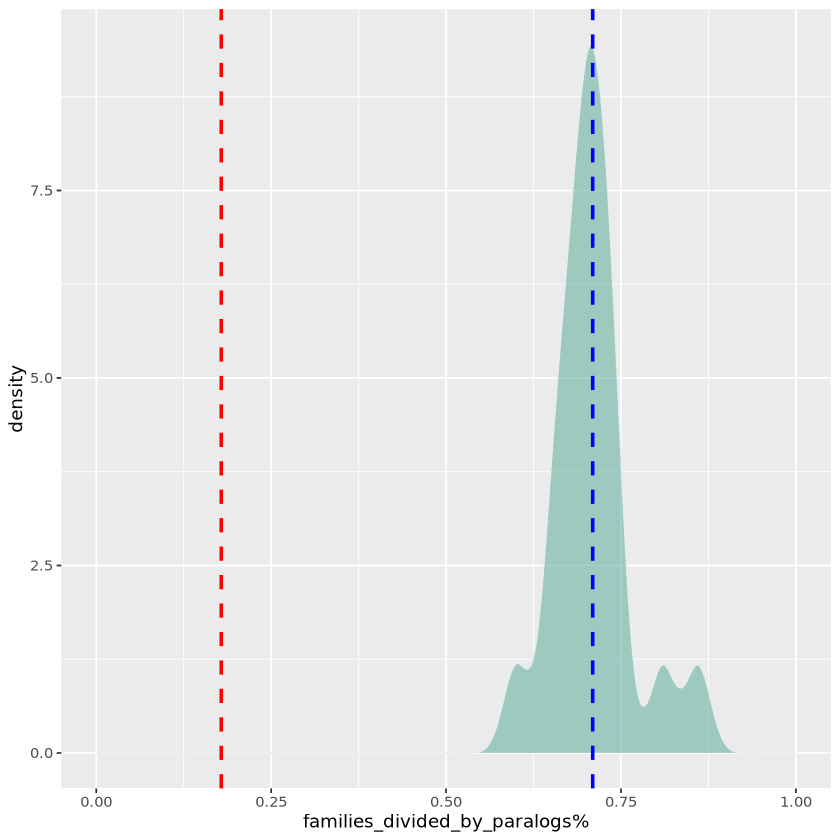

In [33]:
stats %>% as.data.frame() %>% ggplot(aes(`families_divided_by_paralogs%`)) +
  geom_density(fill="#69b3a2", color="#e9ecef", alpha=0.6) +
  geom_vline(aes(xintercept=mean(`families_divided_by_paralogs%`)),
             color="blue", linetype="dashed", linewidth=1) +
  geom_vline(aes(xintercept=length(paralog_pairs_in_our_dataset)/length(unlist(paralog_pairs_in_our_dataset))), # you should use
             color="red", linetype="dashed", linewidth=1) + xlim(0,1)


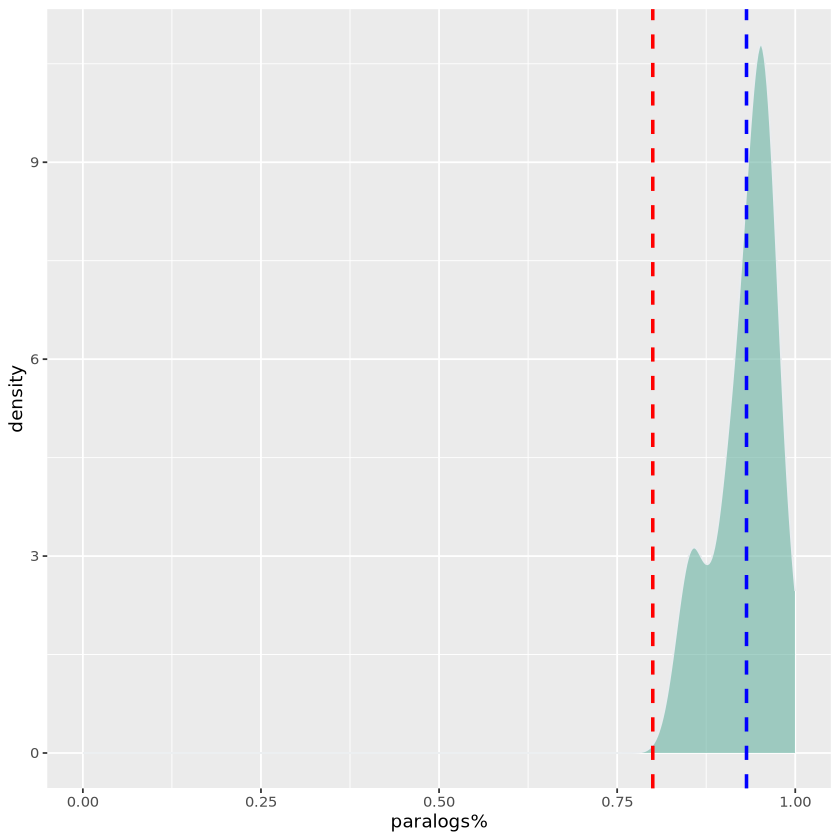

In [34]:
p1 <- stats %>% as.data.frame() %>% ggplot(aes(`paralogs%`)) +
  geom_density(fill="#69b3a2", color="#e9ecef", alpha=0.6) +
  geom_vline(aes(xintercept=mean(`paralogs%`)),
             color="blue", linetype="dashed", linewidth=1) +
  geom_vline(aes(xintercept=paralog_ratio_in_ourdata),
             color="red", linetype="dashed", linewidth=1) + xlim(0,1)

p1

In [27]:
x = merge(rss_top, regulon, by = "TF", all.x = TRUE)

In [28]:
head(x)

TF            cluster         Var.3  value    
1 1810024B03Rik Ependymal cells Rnase4 0.5596655
2 1810024B03Rik Ependymal cells Mdfic  0.7363233
3 1810024B03Rik Ependymal cells Pon3   1.0727133
4 1810024B03Rik Ependymal cells Vangl1 0.4362672
5 1810024B03Rik Ependymal cells Fbrsl1 0.4047820
6 1810024B03Rik Ependymal cells Fkbp11 0.5349831

In [31]:
?write.table